<a href="https://colab.research.google.com/github/AlbertoRomanRamosRodriguez/Tesis-de-Grado/blob/main/APTOS_EYEPACS_grading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grading Diabetic Retinopath with APTOS and EYEPACS

In [1]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [2]:
from sklearn.model_selection import train_test_split
from shutil import copy, unpack_archive,move

import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
aptos_csv = '/kaggle/input/aptos2019-blindness-detection/train.csv'
eyepacs_csv = '/kaggle/input/eyepacspreprocess/trainLabels.csv'
dataframes = [pd.read_csv(csv) for csv in [aptos_csv, eyepacs_csv]]

name_mappings = {
    'id_code': 'image',
    'diagnosis': 'level'
}


for d, extension in zip(dataframes, ['.png', '.jpeg']):
  d.rename(columns=name_mappings, inplace=True)
  d['image'] = d['image']+ extension
  display(d.head())

classes = range(5)
orig_ds = pd.concat(dataframes)
orig_ds.reset_index(inplace=True)
orig_ds.drop(columns=['index'], inplace=True)
orig_ds

,image,level
0,000c1434d8d7.png,2
1,001639a390f0.png,4
2,0024cdab0c1e.png,1
3,002c21358ce6.png,0
4,005b95c28852.png,0


,image,level
0,10_left.jpeg,0
1,10_right.jpeg,0
2,13_left.jpeg,0
3,13_right.jpeg,0
4,15_left.jpeg,1


,image,level
0,000c1434d8d7.png,2
1,001639a390f0.png,4
2,0024cdab0c1e.png,1
3,002c21358ce6.png,0
4,005b95c28852.png,0
...,...,...
38765,44347_right.jpeg,0
38766,44348_left.jpeg,0
38767,44348_right.jpeg,0
38768,44349_left.jpeg,0


level
0    27607
1     2808
2     6287
3     1065
4     1003
Name: image, dtype: int64

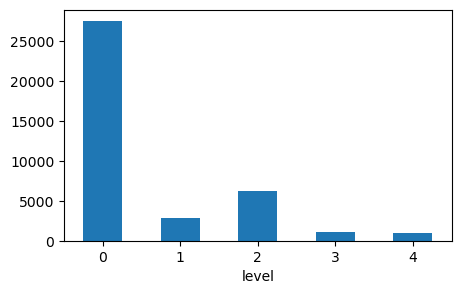

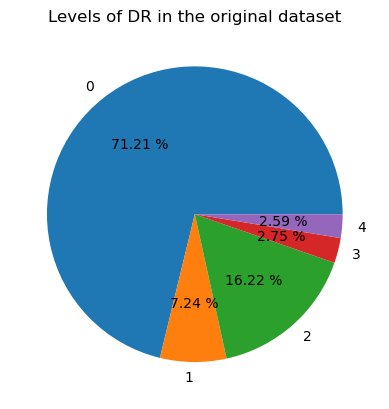

In [4]:
def reset_path(directory:str):
    """
    Deletes an existing directory and re-creates it

    - directory: path to directory
    """
    if os.path.exists(directory):
        !rm -r {directory}
    os.mkdir(directory)

DB_PATH = './DB'
reset_path(DB_PATH)

display(orig_ds.groupby('level')['image'].count())

dfp = orig_ds.pivot_table(
    index='level',
    aggfunc='size'
)
dfp.plot(
    kind='bar',
    figsize=(5,3),
    rot=0
)
plt.show()

classes = 5
plt.pie([orig_ds.loc[orig_ds['level'] == n].count()[0] for n in range(classes)], labels = range(classes), autopct='%.2f %%')
plt.title("Levels of DR in the original dataset")
img_path = os.path.sep.join([DB_PATH, 'distribution.png'])
plt.savefig(img_path)
plt.show()

level
0    1000
1    1000
2    1000
3    1000
4    1000
Name: image, dtype: int64

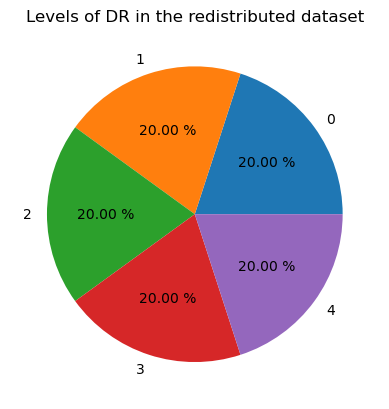

In [5]:
dataset = orig_ds.groupby(['level']).sample(1000)
display(dataset.groupby('level')['image'].count())

plt.pie([dataset.loc[dataset['level'] == n].count()[0] for n in range(classes)], labels = range(classes), autopct='%.2f %%')
plt.title("Levels of DR in the redistributed dataset")
plt.show()

In [6]:
x_train, x_remain, y_train, y_remain = train_test_split(
    dataset['image'],
    dataset['level'],
    train_size=0.8,
    test_size=0.2,
    random_state=42
)

train_df = pd.DataFrame()
train_df['image'] = x_train
train_df['level'] = y_train

remain_df = pd.DataFrame()
remain_df['image'] = x_remain
remain_df['level'] = y_remain

x_val, x_test, y_val, y_test = train_test_split(
    remain_df['image'],
    remain_df['level'],
    train_size=0.5,
    test_size=0.5,
    random_state=42
)

val_df = pd.DataFrame()
val_df['image'] = x_val
val_df['level'] = y_val

test_df = pd.DataFrame()
test_df['image'] = x_test
test_df['level'] = y_test

display(train_df.groupby(['level'])['image'].count())
display(train_df.head())
display(val_df.groupby(['level'])['image'].count())
display(val_df.head())
display(test_df.groupby(['level'])['image'].count())
display(test_df.head())

level
0    784
1    810
2    808
3    790
4    808
Name: image, dtype: int64

,image,level
989,46cdc8b685bd.png,4
6873,3993_right.jpeg,4
22908,24298_left.jpeg,0
32476,36502_left.jpeg,3
4601,1138_left.jpeg,4


level
0    108
1     96
2     96
3    103
4     97
Name: image, dtype: int64

,image,level
17289,17121_left.jpeg,2
8281,5814_right.jpeg,3
2090,92b0d27fc0ec.png,2
889,4029d70e9d8a.png,1
24856,26725_left.jpeg,0


level
0    108
1     94
2     96
3    107
4     95
Name: image, dtype: int64

,image,level
14444,13591_right.jpeg,3
27771,30483_right.jpeg,0
32718,36793_left.jpeg,2
12550,11163_right.jpeg,1
22280,23485_left.jpeg,3


In [7]:
path_dict = {p:os.listdir(p)
              for p in ['/kaggle/input/aptos2019-blindness-detection/train_images', '/kaggle/input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess']}
path_dict

{'/kaggle/input/aptos2019-blindness-detection/train_images': ['ef476be214d4.png',
  '6dcde47060f9.png',
  'ec363f48867b.png',
  '17f6c7072f61.png',
  'b49b2fac2514.png',
  'af6166d57f13.png',
  '8d13c46e7d75.png',
  'c3b15bf9b4bc.png',
  'be68322c7223.png',
  '88e4399d207c.png',
  '0243404e8a00.png',
  '77ab222bf85c.png',
  '4a05f81b3aba.png',
  '61d9c88a3a4b.png',
  '8448af27ba07.png',
  '4554062fa836.png',
  'a688f20f8895.png',
  'f481f76a6b75.png',
  '3af9aaa880e9.png',
  'cb68fce07789.png',
  '5d9c841eb245.png',
  'd4be0403e6ab.png',
  '388f12e8df0b.png',
  'bb7e0a2544cd.png',
  '1d29cb2f4296.png',
  '0083ee8054ee.png',
  'd83c3efade75.png',
  '2927665214e1.png',
  '1e4650743fa2.png',
  '0ac436400db4.png',
  '0d0a21fd354f.png',
  'abdb365cacbc.png',
  'd15ca3469b87.png',
  '576e189d23d4.png',
  '02da652c74b8.png',
  '33ffddea8c6e.png',
  '28f93cad89c5.png',
  '8af50c9d0a86.png',
  '15e96e848b46.png',
  '932181b93b2f.png',
  'fa7fa797c650.png',
  'c68dfa021d62.png',
  '059bc89df7f4.

In [8]:
def clahe_image(path:str):
    # Load the image
    img = cv2.imread(path)
    # mask = cv2.imread('mask.png', 0)

    # Extract the green plane
    green_plane = img[:, :, 1]

    # Define the FA-CLAHE algorithm
    faclahe = cv2.createCLAHE(clipLimit=4.5, tileGridSize=(22, 22))

    # Apply the FA-CLAHE algorithm to the green plane
    faclahe_img = faclahe.apply(green_plane)

    # masked_img = cv2.bitwise_and(faclahe_img, faclahe_img, mask=mask)

    cv2.imwrite(path, faclahe_img)

In [9]:
from shutil import copy
import cv2

splits = [
    (train_df, 'train'),
    (val_df, 'val'),
    (test_df, 'test')
]

for df, set_path in splits:
  df['level'] = df['level'].astype('str')
  ds_dict = df.to_dict(orient='index')
  set_path = os.path.join(DB_PATH, set_path)
  if not os.path.exists(set_path):
    os.mkdir(set_path)

  for datapoint in ds_dict.values():
    orig_path = ''
    for p, imgs in path_dict.items():
        orig_path = os.path.join(p, datapoint['image']) if datapoint['image'] in imgs else orig_path

    if orig_path == '':
      raise ValueError
    dest_path = os.path.join(set_path, datapoint['level'])
    
    if not os.path.exists(dest_path):
      os.mkdir(dest_path)
    
    dest_path = os.path.join(dest_path, datapoint['image'])

    copy(orig_path, dest_path)
    clahe_image(dest_path)

    print(f'Copied {dest_path}')

Copied ./DB/train/4/46cdc8b685bd.png
Copied ./DB/train/4/3993_right.jpeg
Copied ./DB/train/0/24298_left.jpeg
Copied ./DB/train/3/36502_left.jpeg
Copied ./DB/train/4/1138_left.jpeg
Copied ./DB/train/2/21312_right.jpeg
Copied ./DB/train/4/df84e7113003.png
Copied ./DB/train/4/34453_left.jpeg
Copied ./DB/train/2/9633_right.jpeg
Copied ./DB/train/2/28316_left.jpeg
Copied ./DB/train/3/457c7c927e27.png
Copied ./DB/train/1/17873_left.jpeg
Copied ./DB/train/3/c76664770c07.png
Copied ./DB/train/3/28668_right.jpeg
Copied ./DB/train/2/8940_left.jpeg
Copied ./DB/train/2/3989_left.jpeg
Copied ./DB/train/0/23679_right.jpeg
Copied ./DB/train/4/40078_left.jpeg
Copied ./DB/train/3/35966_left.jpeg
Copied ./DB/train/4/32148_left.jpeg
Copied ./DB/train/4/e037643244b7.png
Copied ./DB/train/4/ba08cee68c71.png
Copied ./DB/train/0/5982_left.jpeg
Copied ./DB/train/4/4dc2211a1c31.png
Copied ./DB/train/1/41059_left.jpeg
Copied ./DB/train/1/17089_left.jpeg
Copied ./DB/train/2/38899_right.jpeg
Copied ./DB/train/4/2

In [18]:
# ResNet Grading of Diabetic Retinopathy in PyTorch
from __future__ import print_function, division

from torchvision import datasets, models, transforms
from sklearn.metrics import confusion_matrix
import torch.backends.cudnn as cudnn
from torch.optim import lr_scheduler

import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import seaborn as sn
import pandas as pd
import numpy as np
import torchvision
import torch
import time
import copy
import os

cudnn.benchmark = True
plt.ion()   # interactive mode

## Training the model
def train_model(model, criterion, optimizer, scheduler, num_epochs=25, starting_loss = float('inf'), warmup_epochs = 0):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = starting_loss
    best_acc = 0.0 
    
    total_epochs = num_epochs+warmup_epochs
    try:
        for epoch in range(total_epochs):
            print(f'Epoch {epoch+1}/{total_epochs}')
            
            if warmup_epochs != 0 and epoch == (warmup_epochs - 1):
                for param in model_ft.parameters():
                    param.requires_grad = True
                print(f"Starting full training")
            elif warmup_epochs != 0 and epoch == 0:
                print(f"Starting warmup training")
            elif warmup_epochs != 0:
                print(f"{warmup_epochs-epoch+1} warmup epochs remaining")
            elif epoch == 0:
                print("Training without warmup")
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # Zero the parameter gradients
                    optimizer.zero_grad()

                    # Forward
                    # Track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # Backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # Statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)

                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # Update best validation loss and model weights
                if phase == 'val' and epoch_loss < best_loss:
                    best_loss = epoch_loss
                    best_acc = epoch_acc
                    best_model_wts = copy.deepcopy(model.state_dict())
                    print(f'New best model found with validation loss: {best_loss:.4f}')

            print()

    except KeyboardInterrupt:
        pass

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best validation loss: {best_loss:.4f} | Best validation accuracy: {best_acc:.4f}')

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return (best_loss, model)




def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(sample_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                
                title = f'predicted: {class_names[preds[j]]}, label: {labels[j]}'
                imshow(inputs.cpu().data[j], title=title, fig_size=(12,7))
                plt.show()
                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)


Using device cuda


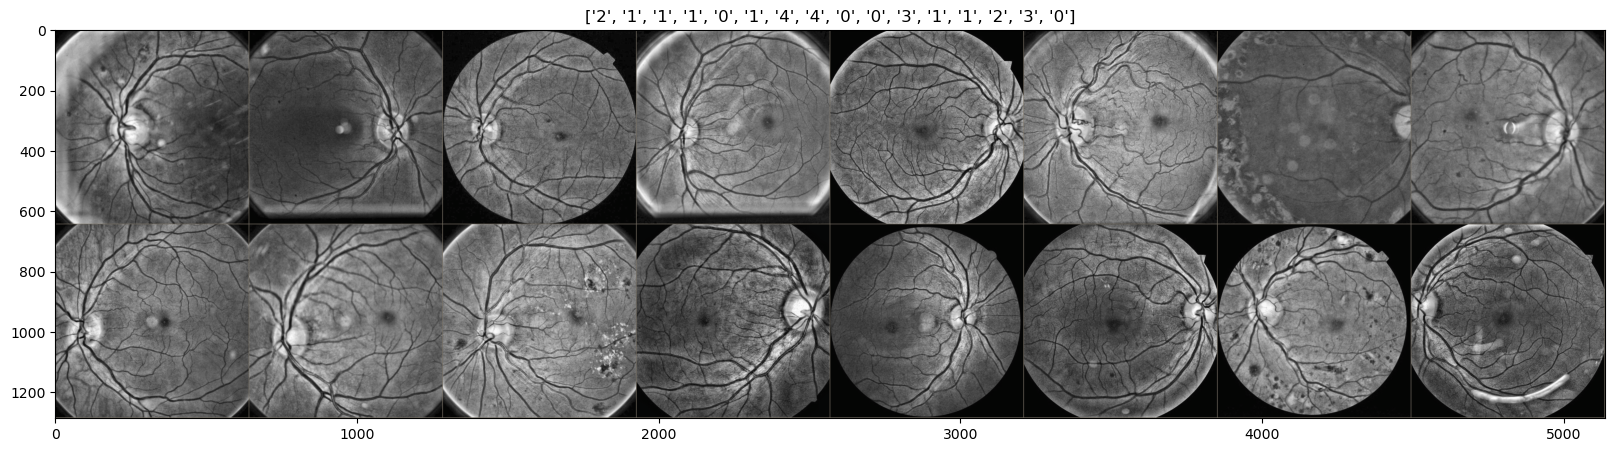

In [19]:
## Load Data
IM_SIZE = 640
batch_size = 16
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(IM_SIZE),
        transforms.CenterCrop(IM_SIZE),
        # transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(IM_SIZE),
        transforms.CenterCrop(IM_SIZE),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(IM_SIZE),
        transforms.CenterCrop(IM_SIZE),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

DATA_DIR = 'DB'
ds_splits = ['train', 'val', 'test']
image_datasets = {x: datasets.ImageFolder(os.path.join(DATA_DIR, x),
                                          data_transforms[x])
                  for x in ds_splits}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                             shuffle=True, num_workers=2)
              for x in ds_splits[:2]}

sample_loader = torch.utils.data.DataLoader(image_datasets['test'], batch_size=batch_size,
                                        shuffle=True, num_workers=2)

test_dataloader = torch.utils.data.DataLoader(image_datasets['test'], batch_size=batch_size,
                                        shuffle=False, num_workers=2)

dataset_sizes = {x: len(image_datasets[x]) for x in ds_splits}
class_names = image_datasets['train'].classes

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f'Using device {device}')

def imshow(inp, title=None, fig_size=(12,7)):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=fig_size)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes], fig_size=(20,15))

In [20]:
import datetime

TIME_STAMP = datetime.datetime.today().strftime('%d_%h_%y_%H_%M')
model_weights = models.ResNet50_Weights.DEFAULT

model_ft = models.resnet50(weights=model_weights)
for param in model_ft.parameters():
    param.requires_grad = False
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 5)
model_ft = nn.DataParallel(model_ft)
model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(
    model_ft.parameters(), 
    lr=0.01, 
    weight_decay=1e-5, 
    momentum=0.9
)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.1)
model_ft

DataParallel(
  (module): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
      

In [21]:
warmup_epochs = 7
training_epochs = 25

print(f"Training on device {device}")
# for param in model_ft.parameters():
#     param.requires_grad = False

best_train_loss, model_ft = train_model(
    model = model_ft, 
    criterion = criterion, 
    optimizer = optimizer_ft, 
    scheduler = exp_lr_scheduler,
    num_epochs = training_epochs,
    warmup_epochs = warmup_epochs
    
)

Training on device cuda
Epoch 1/32
Starting warmup training
----------
train Loss: 1.4400 Acc: 0.3635
val Loss: 1.3339 Acc: 0.4380
New best model found with validation loss: 1.3339

Epoch 2/32
7 warmup epochs remaining
----------
train Loss: 1.3257 Acc: 0.4175
val Loss: 1.2985 Acc: 0.4380
New best model found with validation loss: 1.2985

Epoch 3/32
6 warmup epochs remaining
----------
train Loss: 1.2962 Acc: 0.4378
val Loss: 1.4026 Acc: 0.4320

Epoch 4/32
5 warmup epochs remaining
----------
train Loss: 1.2798 Acc: 0.4522
val Loss: 1.2519 Acc: 0.4500
New best model found with validation loss: 1.2519

Epoch 5/32
4 warmup epochs remaining
----------
train Loss: 1.2477 Acc: 0.4622
val Loss: 1.2300 Acc: 0.4880
New best model found with validation loss: 1.2300

Epoch 6/32
3 warmup epochs remaining
----------
train Loss: 1.2270 Acc: 0.4790
val Loss: 1.2460 Acc: 0.4660

Epoch 7/32
Starting full training
----------
train Loss: 1.2172 Acc: 0.4562
val Loss: 1.1714 Acc: 0.5040
New best model fou

In [ ]:
if not os.path.exists('models'):
  os.mkdir('models')

FILENAME = f"{model_weights}_{warmup_epochs}_{training_epochs}_{best_train_loss}_Grading_{TIME_STAMP}"
print(f'{FILENAME}')
MODEL_PATH = os.path.sep.join(['models', f'{FILENAME}.pt'])
torch.save(model_ft.state_dict(), MODEL_PATH)

<Figure size 640x480 with 0 Axes>

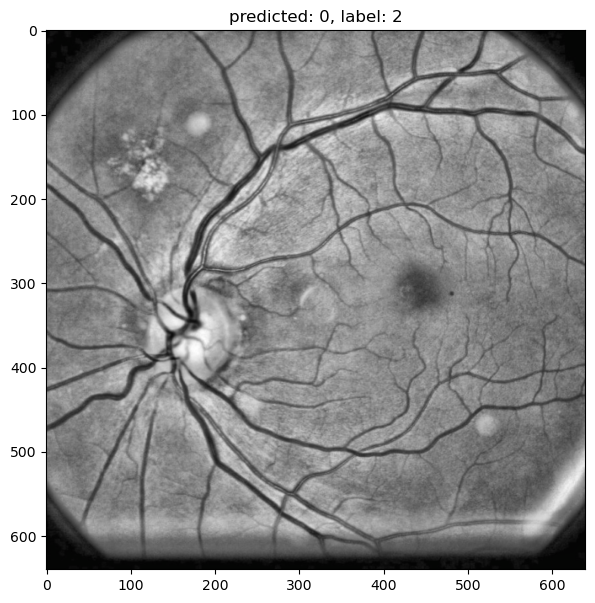

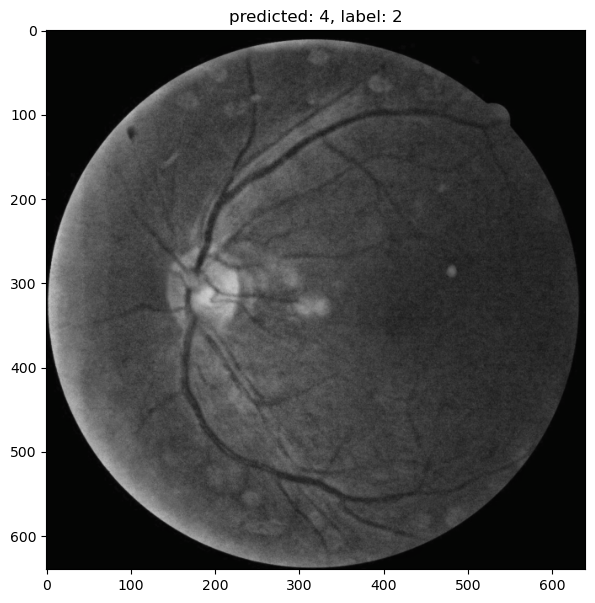

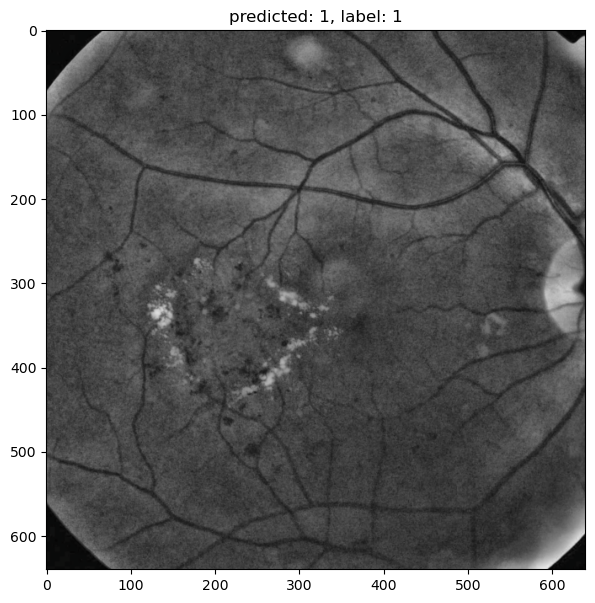

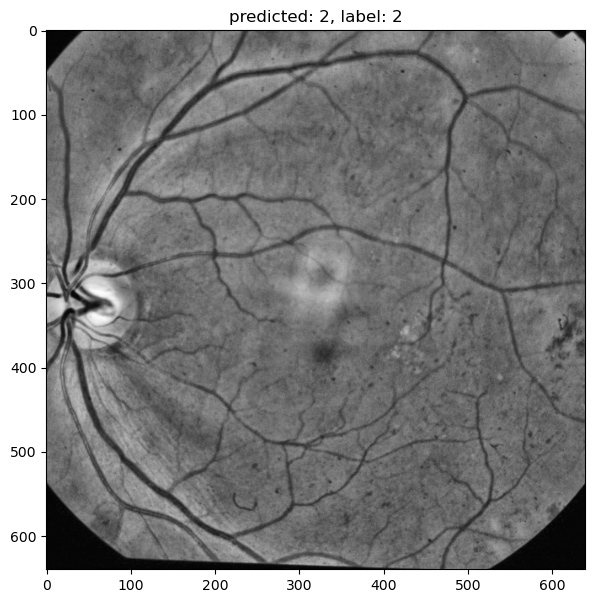

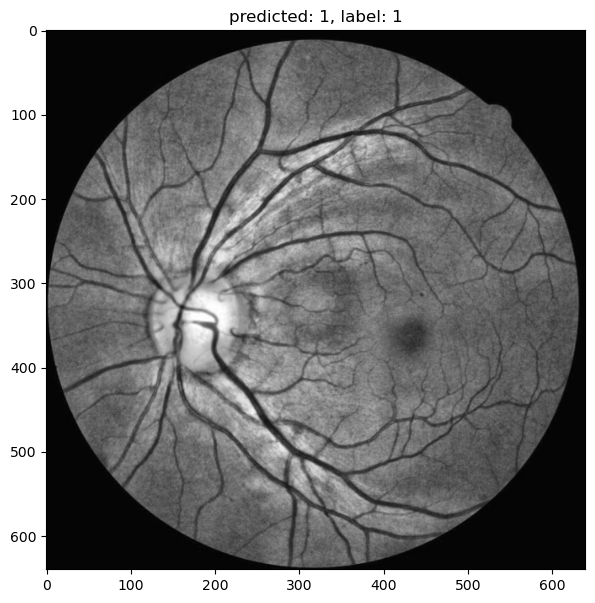

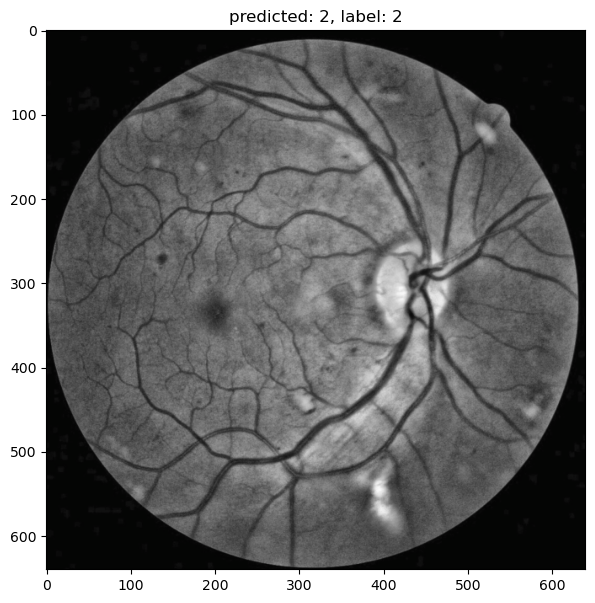

[INFO] Iterating predictions
[INFO] Finished iterating predictions
[INFO] Building Matrix


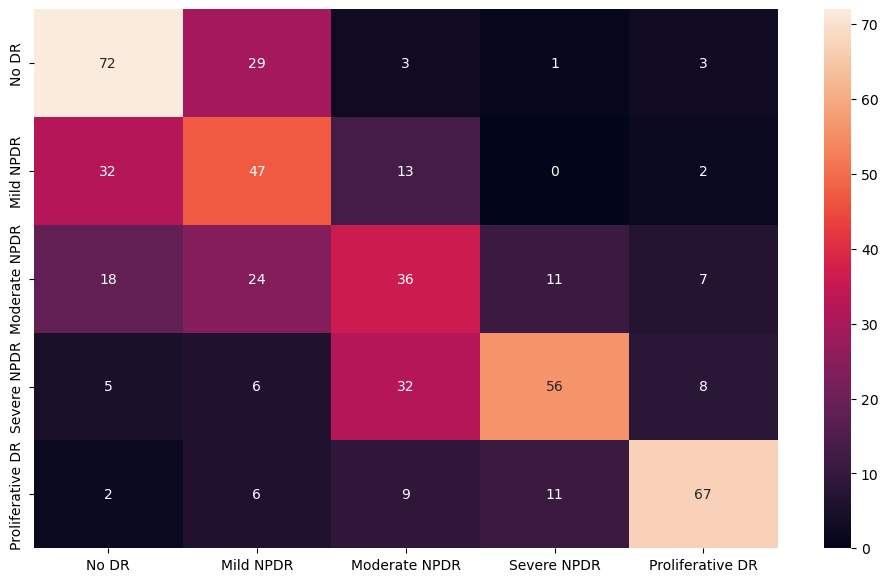

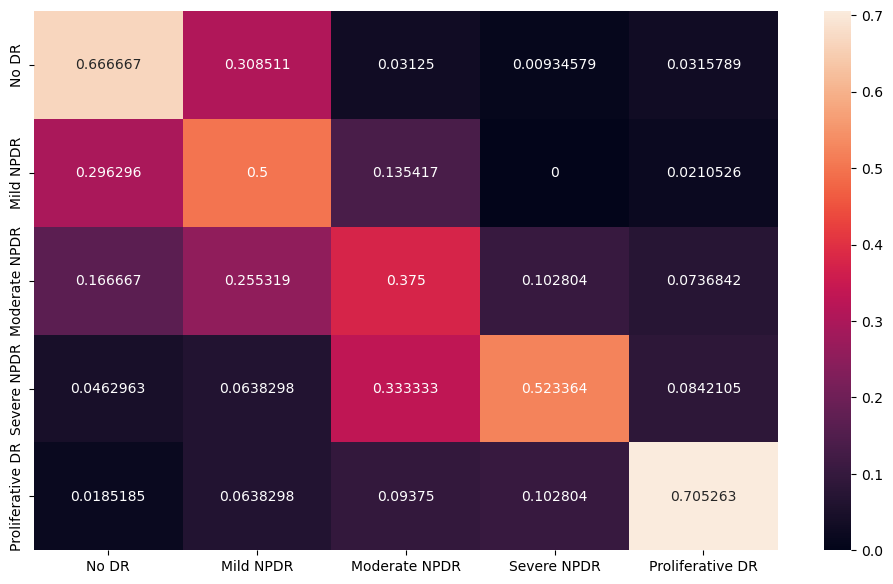

In [23]:
visualize_model(model_ft)
y_pred = []
y_true = []
# iterate over test data
print("[INFO] Iterating predictions")

# device = torch.device("cpu")
# model_ft = model_ft.to(device)
model_ft.eval()

for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        output = model_ft(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth
                
print("[INFO] Finished iterating predictions")
print("[INFO] Building Matrix")
# constant for classes
classes = ('No DR', 'Mild NPDR', 'Moderate NPDR', 'Severe NPDR', 'Proliferative DR')

def get_matrix(cfm: np.ndarray, pct:True):
        if pct:
                return cfm / np.sum(cfm, axis=1)
        else:
                return cfm

if not os.path.exists('output'):
  os.mkdir('output')
OUTPATH = os.path.sep.join(['output',f'{FILENAME}'])
if not os.path.exists(OUTPATH):
        os.mkdir(OUTPATH)

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
for pct in (False, True):
        df_cm = pd.DataFrame(get_matrix(cfm=cf_matrix,pct=pct), index = [i for i in classes],
                        columns = [i for i in classes])
        plt.figure(figsize = (12,7))
        sn.heatmap(df_cm, annot=True, fmt='g')
        cm_path = os.path.sep.join([OUTPATH, f'confusion_matrix_pct_{pct}.png'])
        plt.savefig(cm_path)